#  Adult Income Dataset

## Load the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
plt.style.use('ggplot')
%matplotlib inline

## Read the adult income dataset

In [2]:
url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Wrangling-Workshop/master/Chapter04/datasets/adult_income_data.csv'
urlretrieve(url, 'adult.csv')

('adult.csv', <http.client.HTTPMessage at 0x7fdc141aac90>)

In [3]:
adult = pd.read_csv('adult.csv', na_values='?')
adult.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


## Create a script that read a text file

In [4]:
url = ('https://raw.githubusercontent.com/PacktWorkshops/'
'The-Data-Wrangling-Workshop/master/Chapter04/datasets/adult_income_names.txt'
)
urlretrieve(url, 'names.txt')

('names.txt', <http.client.HTTPMessage at 0x7fdc1419fb10>)

In [5]:
res = []
names = []
with open('names.txt', 'r') as f:
  for line in f.readlines():
    res.append(line.split(':')[0])
  for item in res:
    if item != '\n':
      names.append(item)

In [6]:
print(names)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


In [7]:
names = names + ['income']

In [8]:
print(names)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


## Find the missing values

In [9]:
adult.columns = names
adult.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K


In [10]:
adult.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [11]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   sex             32560 non-null  object
 9   capital-gain    32560 non-null  int64 
 10  capital-loss    32560 non-null  int64 
 11  hours-per-week  32560 non-null  int64 
 12  native-country  32560 non-null  object
 13  income          32560 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [12]:
adult.shape

(32560, 14)

## Create df

In [14]:
subset_adult = adult[['age', 'education', 'occupation']]
subset_adult.head()

,age,education,occupation
0,50,Bachelors,Exec-managerial
1,38,HS-grad,Handlers-cleaners
2,53,11th,Handlers-cleaners
3,28,Bachelors,Prof-specialty
4,37,Masters,Exec-managerial


## histogram of age

(array([2410., 3160., 2461., 3429., 3465., 2583., 3197., 2965., 1828.,
        2139., 1558., 1033.,  996.,  599.,  269.,  227.,  120.,   54.,
          20.,   47.]),
 array([17.  , 20.65, 24.3 , 27.95, 31.6 , 35.25, 38.9 , 42.55, 46.2 ,
        49.85, 53.5 , 57.15, 60.8 , 64.45, 68.1 , 71.75, 75.4 , 79.05,
        82.7 , 86.35, 90.  ]),
 <a list of 20 Patch objects>)

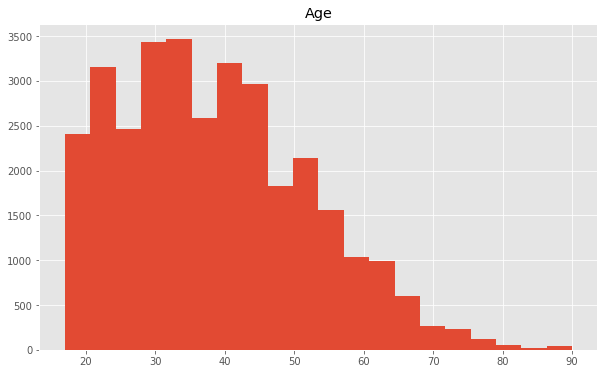

In [16]:
plt.figure(figsize=(10, 6))
plt.title('Age')
plt.hist(subset_adult.age, bins=20)

## number of people who are aged between 30 and 50

In [22]:
mask = ((subset_adult.age > 30) & (subset_adult.age < 50))
subset_adult['age'][mask].count()

14926

## Group the records based on age and education

In [23]:
subset_adult.groupby(['age', 'education']).mean()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


Empty DataFrame
Columns: []
Index: [(17,  10th), (17,  11th), (17,  12th), (17,  5th-6th), (17,  7th-8th), (17,  9th), (17,  HS-grad), (17,  Some-college), (18,  10th), (18,  11th), (18,  12th), (18,  5th-6th), (18,  7th-8th), (18,  9th), (18,  HS-grad), (18,  Masters), (18,  Some-college), (19,  10th), (19,  11th), (19,  12th), (19,  1st-4th), (19,  5th-6th), (19,  7th-8th), (19,  9th), (19,  Assoc-acdm), (19,  Assoc-voc), (19,  Bachelors), (19,  HS-grad), (19,  Preschool), (19,  Some-college), (20,  10th), (20,  11th), (20,  12th), (20,  1st-4th), (20,  5th-6th), (20,  7th-8th), (20,  9th), (20,  Assoc-acdm), (20,  Assoc-voc), (20,  Bachelors), (20,  HS-grad), (20,  Masters), (20,  Preschool), (20,  Some-college), (21,  10th), (21,  11th), (21,  12th), (21,  1st-4th), (21,  5th-6th), (21,  7th-8th), (21,  9th), (21,  Assoc-acdm), (21,  Assoc-voc), (21,  Bachelors), (21,  HS-grad), (21,  Masters), (21,  Preschool), (21,  Some-college), (22,  10th), (22,  11th), (22,  12th), (22,  1st-4th), (22,  5th-6th), (22,  7th-8th), (22,  9th), (22,  Assoc-acdm), (22,  Assoc-voc), (22,  Bachelors), (22,  HS-grad), (22,  Some-college), (23,  10th), (23,  11th), (23,  12th), (23,  1st-4th), (23,  5th-6th), (23,  7th-8th), (23,  9th), (23,  Assoc-acdm), (23,  Assoc-voc), (23,  Bachelors), (23,  HS-grad), (23,  Masters), (23,  Preschool), (23,  Some-college), (24,  10th), (24,  11th), (24,  12th), (24,  1st-4th), (24,  5th-6th), (24,  7th-8th), (24,  9th), (24,  Assoc-acdm), (24,  Assoc-voc), (24,  Bachelors), (24,  Doctorate), (24,  HS-grad), (24,  Masters), (24,  Preschool), (24,  Some-college), (25,  10th), ...]

[965 rows x 0 columns]

## Group by occupation

In [24]:
subset_adult.groupby('occupation').describe()['age']

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3769.0,36.963916,13.364730,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


Exec-managerial and Priv-house-serv

In [26]:
stats = subset_adult.groupby('occupation').describe()['age']

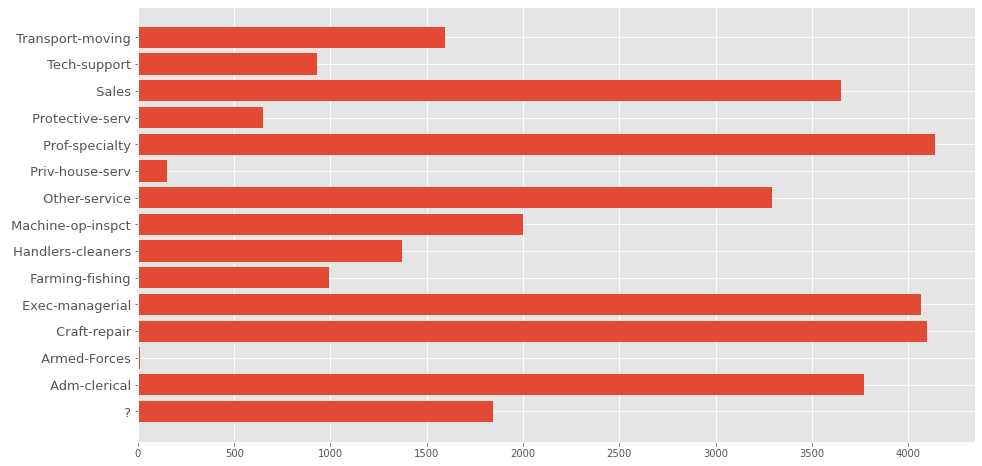

In [27]:
plt.figure(figsize=(15,8))
plt.barh(y=stats.index,
         width=stats['count'])
plt.yticks(fontsize=13)
plt.show()